<a href="https://colab.research.google.com/github/JoseNormando/Projeto_Analise_Vendas_Jogos/blob/main/An%C3%A1lise_Vendas_Jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green>CONHECENDO OS DADOS</font>
***

## Pesquisa de Venda de Jogos

A pesquisa utilizada mostra a quantidade de unidades vendidas de mais de 11 mil jogos, divididas em vários gêneros e seu desempenho de vendas ao redor do mundo.

O foco deste projeto é analisar detalhadamente os dados para identificar resultados relevantes, juntamente com sua visualização.

## Fonte dos Dados

https://www.kaggle.com/datasets/gregorut/videogamesales

## Variáveis utilizadas

> Rank
***
Ranking de vendas do jogo

>Name
***
Nome do jogo

>Platform
***
Plataforma onde o jogo foi lançado (PS4, PS5, etc)

>Year
***
Ano de lançamento do jogo

>Genre
***
Gênero do jogo

>Publisher
***
Publicador do jogo

>NA_Sales
***
Vendas na América do Norte (em milhões)

>EU_Sales
***
Vendas na Europa (em milhões)

>JP_Sales
***
Vendas no Japão (em milhões)

>Other_Sales
***
Vendas no resto do mundo (em milhões)

>Global_Sales
***
Total de vendas pelo mundo (em milhões)

# **1 - Importando a Base de Dados**
***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.set_index('Rank', inplace = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


# **2 - Verificando valores nulos**
***

In [32]:
display(df.isnull().sum())
display(df[df.Year.isnull()].head())
display(df[df.Publisher.isnull()].head())

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64


***
> Já que não será possível atribuir valores aos elementos nulos, e eles não irão interferir diretamente em nossa análise, não será necessário nenhum tratamento nesses valores.
***

# **3 - Jogos mais vendidos**
***


## Top 10 mais vendidos na América do Norte


In [8]:
top_10_na = df.groupby('Name')[['NA_Sales']].sum().sort_values('NA_Sales', ascending = False).head(10)
top_10_na

,NA_Sales
Name,
Wii Sports,41.49
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,23.46
Call of Duty: Black Ops,17.59
Super Mario World,15.99
Mario Kart Wii,15.85
Wii Sports Resort,15.75


In [9]:
top_10_na.columns = ['Vendas América do Norte']
top_10_na.index.name = 'Nome'
top_10_na

,Vendas América do Norte
Nome,
Wii Sports,41.49
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,23.46
Call of Duty: Black Ops,17.59
Super Mario World,15.99
Mario Kart Wii,15.85
Wii Sports Resort,15.75


In [10]:
estilo_na = top_10_na.style.format('{:.2f} und')
estilo_na

,Vendas América do Norte
Nome,
Wii Sports,41.49 und
Super Mario Bros.,32.48 und
Duck Hunt,26.93 und
Tetris,26.17 und
Grand Theft Auto V,23.46 und
Call of Duty: Black Ops,17.59 und
Super Mario World,15.99 und
Mario Kart Wii,15.85 und
Wii Sports Resort,15.75 und


In [11]:
cabecalho = {
    'selector': 'th',
    'props': 'font-weight: bold; font-family: Arial; text-align: right; background-color: #34495E; color: #dddd55'
}

celulas = {
    'selector': 'td',
    'props': 'background-color: #34495E; color: white'
}

estilo_na.set_table_styles([cabecalho, celulas])

estilo_na.set_table_styles({
    'Wii Sports': [{
        'selector': 'th',
        'props': 'border-top: 1px solid white'
    },
    {
     'selector': 'td',
     'props': 'border-top: 1px solid white'
    }]
}, overwrite = False, axis = 1)

,Vendas América do Norte
Nome,
Wii Sports,41.49 und
Super Mario Bros.,32.48 und
Duck Hunt,26.93 und
Tetris,26.17 und
Grand Theft Auto V,23.46 und
Call of Duty: Black Ops,17.59 und
Super Mario World,15.99 und
Mario Kart Wii,15.85 und
Wii Sports Resort,15.75 und


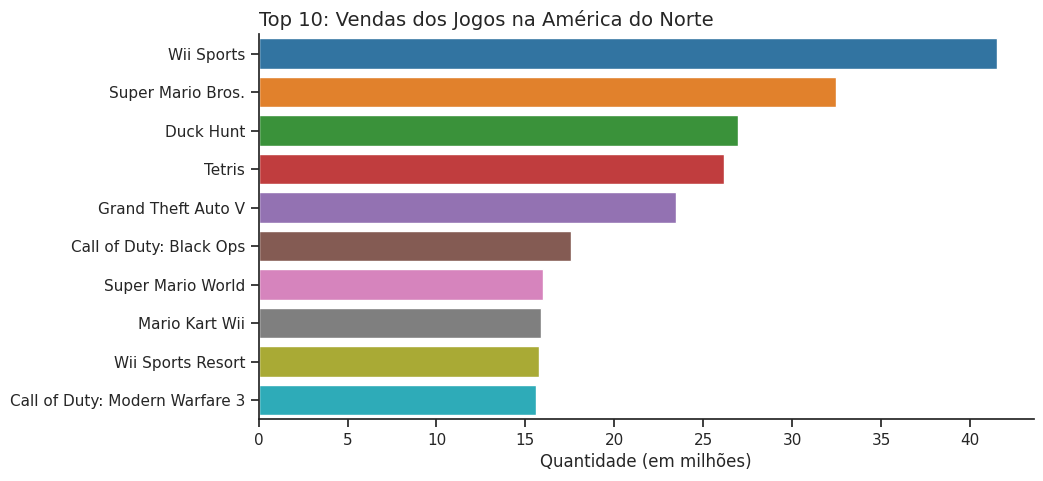

In [12]:
sns.set_theme(style = 'ticks')

fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(data = top_10_na, y = top_10_na.index, x = 'Vendas América do Norte', orient = 'h', palette = 'tab10')

ax.set_title('Top 10: Vendas dos Jogos na América do Norte', loc = 'left', fontsize = 14)
ax.set_xlabel('Quantidade (em milhões)')
ax.set_ylabel('')
sns.despine()

plt.show()

## Top 10 mais vendidos na Europa

In [13]:
top_10_eu = df.groupby('Name')[['EU_Sales']].sum().sort_values('EU_Sales', ascending = False).head(10)
top_10_eu

,EU_Sales
Name,
Wii Sports,29.02
Grand Theft Auto V,23.04
Mario Kart Wii,12.88
FIFA 15,12.40
Call of Duty: Modern Warfare 3,11.29
FIFA 16,11.29
FIFA 14,11.14
Call of Duty: Black Ops II,11.05
Wii Sports Resort,11.01


In [14]:
top_10_eu.columns = ['Vendas Europa']
top_10_eu.index.name = 'Nome'
top_10_eu

,Vendas Europa
Nome,
Wii Sports,29.02
Grand Theft Auto V,23.04
Mario Kart Wii,12.88
FIFA 15,12.40
Call of Duty: Modern Warfare 3,11.29
FIFA 16,11.29
FIFA 14,11.14
Call of Duty: Black Ops II,11.05
Wii Sports Resort,11.01


In [15]:
estilo_eu = top_10_eu.style.format('{:.2f} und')
estilo_eu

,Vendas Europa
Nome,
Wii Sports,29.02 und
Grand Theft Auto V,23.04 und
Mario Kart Wii,12.88 und
FIFA 15,12.40 und
Call of Duty: Modern Warfare 3,11.29 und
FIFA 16,11.29 und
FIFA 14,11.14 und
Call of Duty: Black Ops II,11.05 und
Wii Sports Resort,11.01 und


In [16]:
cabecalho = {
    'selector': 'th',
    'props': 'font-weight: bold; font-family: Arial; text-align: right; background-color: #34495E; color: #dddd55'
}

celulas = {
    'selector': 'td',
    'props': 'background-color: #34495E; color: white'
}

estilo_eu.set_table_styles([cabecalho, celulas])

estilo_eu.set_table_styles({
    'Wii Sports': [{
        'selector': 'td',
        'props': 'border-top: 1px solid white'
    },
    {
        'selector': 'th',
        'props': 'border-top: 1px solid white'
    }]
}, overwrite = False, axis = 1)

,Vendas Europa
Nome,
Wii Sports,29.02 und
Grand Theft Auto V,23.04 und
Mario Kart Wii,12.88 und
FIFA 15,12.40 und
Call of Duty: Modern Warfare 3,11.29 und
FIFA 16,11.29 und
FIFA 14,11.14 und
Call of Duty: Black Ops II,11.05 und
Wii Sports Resort,11.01 und


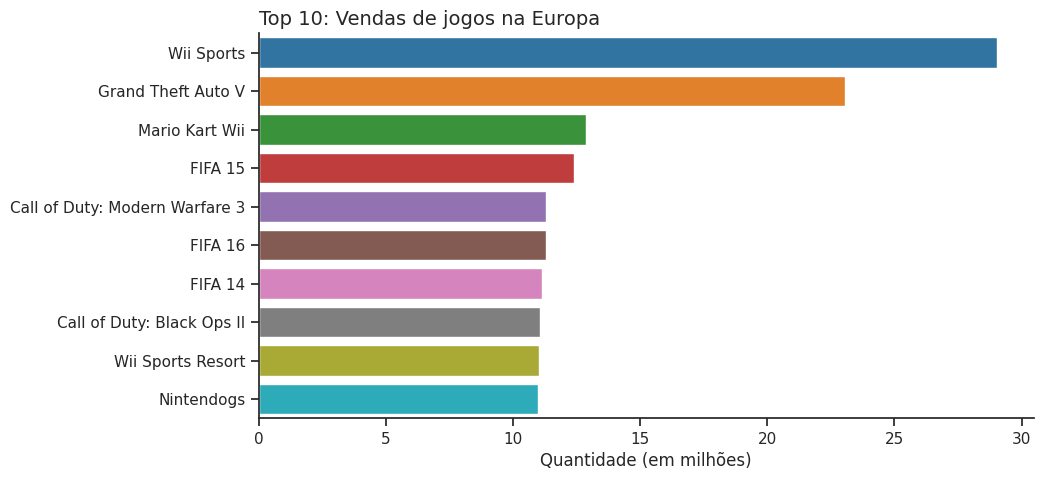

In [17]:
sns.set_theme(style = 'ticks')

fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(data = top_10_eu, x = 'Vendas Europa', y = top_10_eu.index, orient = 'h', palette = 'tab10')

ax.set_title('Top 10: Vendas de jogos na Europa', loc = 'left', fontsize = 14)
ax.set_xlabel('Quantidade (em milhões)')
ax.set_ylabel('')

sns.despine()
plt.show()

## **Top 10 mais vendidos no Japão**

In [18]:
top_10_jp = df.groupby('Name')[['JP_Sales']].sum().sort_values('JP_Sales', ascending = False).head(10)
top_10_jp

,JP_Sales
Name,
Pokemon Red/Pokemon Blue,10.22
Pokemon Gold/Pokemon Silver,7.20
Super Mario Bros.,6.96
New Super Mario Bros.,6.50
Pokemon Diamond/Pokemon Pearl,6.04
Tetris,6.03
Pokemon Black/Pokemon White,5.65
Dragon Quest VII: Warriors of Eden,5.40
Pokemon Ruby/Pokemon Sapphire,5.38


In [19]:
top_10_jp.columns = ['Vendas Japão']
top_10_jp.index.name = 'Nome'
top_10_jp

,Vendas Japão
Nome,
Pokemon Red/Pokemon Blue,10.22
Pokemon Gold/Pokemon Silver,7.20
Super Mario Bros.,6.96
New Super Mario Bros.,6.50
Pokemon Diamond/Pokemon Pearl,6.04
Tetris,6.03
Pokemon Black/Pokemon White,5.65
Dragon Quest VII: Warriors of Eden,5.40
Pokemon Ruby/Pokemon Sapphire,5.38


In [20]:
estilo_jp = top_10_jp.style.format('{:.2f} und')
estilo_jp

,Vendas Japão
Nome,
Pokemon Red/Pokemon Blue,10.22 und
Pokemon Gold/Pokemon Silver,7.20 und
Super Mario Bros.,6.96 und
New Super Mario Bros.,6.50 und
Pokemon Diamond/Pokemon Pearl,6.04 und
Tetris,6.03 und
Pokemon Black/Pokemon White,5.65 und
Dragon Quest VII: Warriors of Eden,5.40 und
Pokemon Ruby/Pokemon Sapphire,5.38 und


In [21]:
cabecalho = {
    'selector': 'th',
    'props': 'font-weight: bold; font-family: Arial; text-align: right; background-color: #34495E; color: #dddd55'
}

celulas = {
    'selector': 'td',
    'props': 'background-color: #34495E; color: white'
}

estilo_jp.set_table_styles([cabecalho, celulas])

estilo_jp.set_table_styles({
    'Pokemon Red/Pokemon Blue': [{
        'selector': 'td',
        'props': 'border-top: 1px solid white'
    },
    {
        'selector': 'th',
        'props': 'border-top: 1px solid white'
    }]
}, overwrite = False, axis = 1)

,Vendas Japão
Nome,
Pokemon Red/Pokemon Blue,10.22 und
Pokemon Gold/Pokemon Silver,7.20 und
Super Mario Bros.,6.96 und
New Super Mario Bros.,6.50 und
Pokemon Diamond/Pokemon Pearl,6.04 und
Tetris,6.03 und
Pokemon Black/Pokemon White,5.65 und
Dragon Quest VII: Warriors of Eden,5.40 und
Pokemon Ruby/Pokemon Sapphire,5.38 und


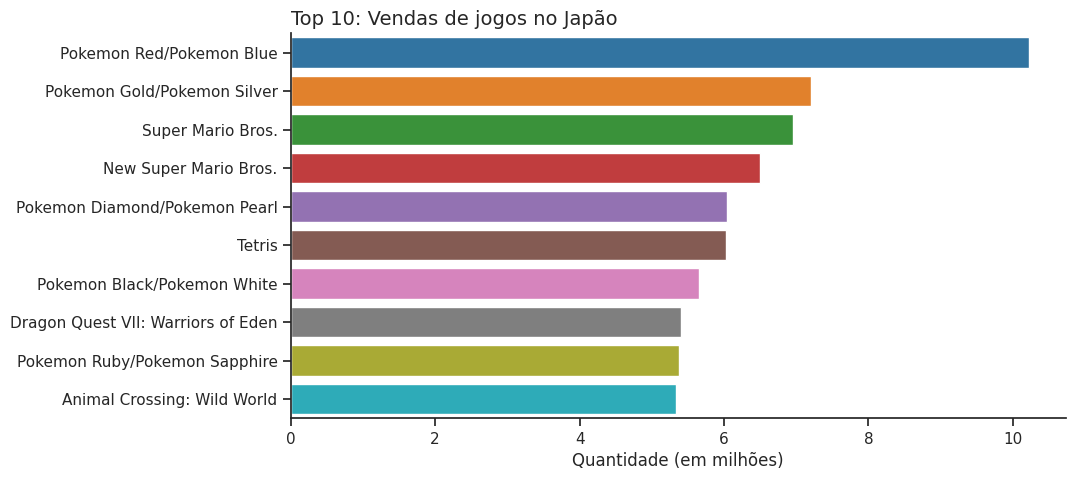

In [22]:
sns.set_theme(style = 'ticks')
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(data = top_10_jp, y = top_10_jp.index, x = 'Vendas Japão', orient = 'h', palette = 'tab10')

ax.set_title('Top 10: Vendas de jogos no Japão', loc = 'left', fontsize = 14)
ax.set_xlabel('Quantidade (em milhões)')
ax.set_ylabel('')

sns.despine()
plt.show()

## **Top 10 mais vendidos no mundo**

In [23]:
top_10_mundo = df.groupby('Name')[['Global_Sales']].sum().sort_values('Global_Sales', ascending = False).head(10)
top_10_mundo

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Black Ops,31.03
Call of Duty: Modern Warfare 3,30.83


In [24]:
top_10_mundo.columns = ['Vendas no Mundo']
top_10_mundo.index.name = 'Nome'
top_10_mundo

,Vendas no Mundo
Nome,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Black Ops,31.03
Call of Duty: Modern Warfare 3,30.83


In [25]:
estilo_md = top_10_mundo.style.format('{:.2f} und')
estilo_md

,Vendas no Mundo
Nome,
Wii Sports,82.74 und
Grand Theft Auto V,55.92 und
Super Mario Bros.,45.31 und
Tetris,35.84 und
Mario Kart Wii,35.82 und
Wii Sports Resort,33.00 und
Pokemon Red/Pokemon Blue,31.37 und
Call of Duty: Black Ops,31.03 und
Call of Duty: Modern Warfare 3,30.83 und


In [26]:
cabecalho = {
    'selector': 'th',
    'props': 'font-weight: bold; font-family: Arial; text-align: right; background-color: #34495E; color: #dddd55'
}

celulas = {
    'selector': 'td',
    'props': 'background-color: #34495E; color: white'
}

estilo_md.set_table_styles([cabecalho, celulas])

estilo_md.set_table_styles({
    'Wii Sports': [{
        'selector': 'td',
        'props': 'border-top: 1px solid white'
    },
    {
        'selector': 'th',
        'props': 'border-top: 1px solid white'
    }]
}, overwrite = False, axis = 1)

,Vendas no Mundo
Nome,
Wii Sports,82.74 und
Grand Theft Auto V,55.92 und
Super Mario Bros.,45.31 und
Tetris,35.84 und
Mario Kart Wii,35.82 und
Wii Sports Resort,33.00 und
Pokemon Red/Pokemon Blue,31.37 und
Call of Duty: Black Ops,31.03 und
Call of Duty: Modern Warfare 3,30.83 und


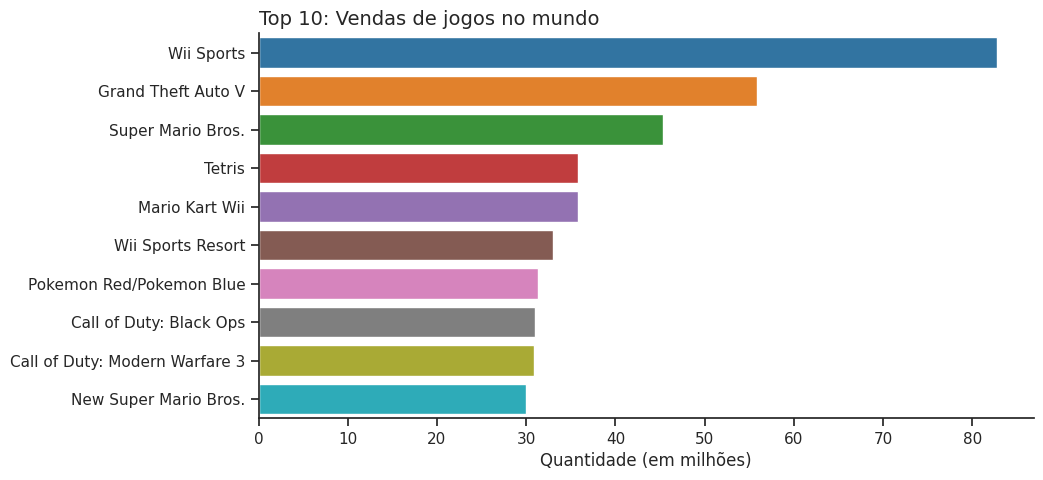

In [27]:
sns.set_theme(style = 'ticks')
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(data = top_10_mundo, y = top_10_mundo.index, x = 'Vendas no Mundo', orient = 'h', palette = 'tab10')

ax.set_title('Top 10: Vendas de jogos no mundo', loc = 'left', fontsize = 14)
ax.set_xlabel('Quantidade (em milhões)')
ax.set_ylabel('')

sns.despine()
plt.show()

# 4 - Frequência dos gêneros mais jogados
***

In [28]:
df_gn = pd.DataFrame(df['Genre'].value_counts())
df_gn.index.name = 'Nome'
df_gn.columns = ['Frequência']
df_gn

,Frequência
Nome,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


In [29]:
df_gn['Porcentagem %'] = df['Genre'].value_counts(normalize = True) * 100
df_gn

,Frequência,Porcentagem %
Nome,,
Action,3316,19.978311
Sports,2346,14.134233
Misc,1739,10.477166
Role-Playing,1488,8.964936
Shooter,1310,7.892517
Adventure,1286,7.747921
Racing,1249,7.525003
Platform,886,5.337993
Simulation,867,5.223521


In [30]:
estilo_gn = df_gn.style.format({'Porcentagem %': '{:.2f} %'})\
                       .bar(subset = 'Porcentagem %', vmin = 0, vmax = 100, color = '#9CD33B', height=50, width=100)

cabecalho = {
    'selector': 'th',
    'props': 'font-weight: bold; font-family: Arial; text-align: right; background-color: #34495E; color: #dddd55'
}
celulas = {
    'selector': 'td',
    'props': 'background-color: #34495E; color: white;'
}

estilo_gn.set_table_styles([cabecalho, celulas])

estilo_gn.set_table_styles({
    'Action': [{
        'selector': 'th',
        'props': 'border-top: 1px solid white'
    },
    {
        'selector': 'td',
        'props': 'border-top: 1px solid white'
    }]
}, overwrite = False, axis = 1)

,Frequência,Porcentagem %
Nome,,
Action,3316,19.98 %
Sports,2346,14.13 %
Misc,1739,10.48 %
Role-Playing,1488,8.96 %
Shooter,1310,7.89 %
Adventure,1286,7.75 %
Racing,1249,7.53 %
Platform,886,5.34 %
Simulation,867,5.22 %
